In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import os
import platform

%load_ext autoreload
%autoreload 2

In [5]:
os.chdir("D:/Dropbox/Study/GitHub/adios")
os.getcwd()

'D:\\Dropbox\\Study\\GitHub\\adios'

# Load data

In [6]:
if platform.system() == "Darwin":
    print("Using MacOS.")
    data_folder = ""  
elif platform.system() == "Linux":
    print("Using Linux.")
    data_folder = os.path.normpath("/mnt/scratch07/yilong")
else:
    print("Using Windows.")
    data_folder = os.path.normpath("")
#     large_data_folder = os.path.normpath("D:\\Backup\\JET-Detection\\Heartbeats_dict_20220201\\")

Using Windows.


In [7]:
patient_ID_list_train = [398573, 462229, 637891, 667681, 537854, 628521, 642321, 662493,
                         387479, 624179, 417349, 551554, 631270, 655769, 678877]  # 15
patient_ID_list_test = [756172, 424072, 748555, 748900, 759678, 741235, 595561, 678607,
                        782501, 510915, 771495, 740475, 533362, 581650, 803389, 577874,
                        681150, 536886, 477589, 844864, 824744, 515544, 771958, 725860, 609090]  # 25
patient_ID_list_val = [462229, 642321, 387479]  # 3
patient_ID_list_dev = [patient_ID for patient_ID in patient_ID_list_train if
                       patient_ID not in patient_ID_list_val]  # 12

In [8]:
data_folder = os.path.normpath("D:\\Dropbox\\Study\\GitHub\\JET-Detection")
feature_with_ecg_df_train = None
debug = True
if debug:
    feature_with_ecg_df_dev = np.load(os.path.join(data_folder, "ECG_CVP_20221101_dev_10000.npz"))
else:
    feature_with_ecg_df_dev = np.load(os.path.join(data_folder, "ECG_CVP_20221101_dev.npz"))
feature_with_ecg_df_val = np.load(os.path.join(data_folder, "ECG_CVP_20221101_val.npz"))
feature_with_ecg_df_test = np.load(os.path.join(data_folder, "ECG_CVP_20221101_test.npz"))

In [11]:
feature_with_ecg_df_dev_single_lead = feature_with_ecg_df_dev
feature_with_ecg_df_val_single_lead = feature_with_ecg_df_val
feature_with_ecg_df_test_single_lead = feature_with_ecg_df_test
ecg_mat = feature_with_ecg_df_dev_single_lead['data_tensor']
signal_min_train = np.min(ecg_mat, axis=)
ecg_mat.shape

(10000, 2, 300)

In [14]:
np.min(np.min(ecg_mat, axis=0), axis=1)

array([ -4.37769091, -56.79999924])

In [20]:
np.min(ecg_mat, axis=2) # should be N x C

array([[-2.31336673,  5.5999999 ],
       [-1.9837522 ,  5.80000019],
       [-2.30443032,  7.5999999 ],
       ...,
       [-3.12499937,  2.61137256],
       [-3.12057878,  2.5999999 ],
       [-3.10730849,  2.5999999 ]])

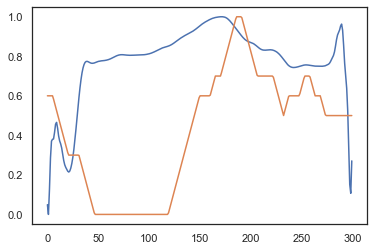

In [36]:
ecg_min = np.min(ecg_mat, axis=2)[:, :, np.newaxis]
ecg_max = np.max(ecg_mat, axis=2)[:, :, np.newaxis]
ecg_mat = (ecg_mat - ecg_min) / (ecg_max - ecg_min)
ecg_min.shape, ecg_max.shape 
sns.set(style="white")
plt.plot(ecg_mat[3, ...].T)

In [ ]:
feature_with_ecg_df_test_single_lead

In [71]:
def Show_ECG_CVPs(dataset_df, num_random_cycle_to_show=5, num_cycle_per_col=5, seed=0, label_dict=None, color_dict=None, normalize=None):

    # dataset_df = feature_with_ecg_df_test_single_lead
    # seed = 0
    # num_random_cycle_to_show = 5
    # num_cycle_per_col = 5
    # label_dict = None
    # color_dict = None
    
    data_tensor = dataset_df['data_tensor']
    data_label = dataset_df['data_label']
    
    if label_dict is None:
        label_dict = {0: "Sinus", 1: "JET"}
    if color_dict is None:
        color_dict = {0: cm.tab10(0), 1: cm.tab10(1)}
        
    """ Randomly select rows from df """
    np.random.seed(seed)
    idx_list = np.random.choice(np.arange(len(data_label)), size=num_random_cycle_to_show, replace=False)
    
    nrow = np.ceil(num_random_cycle_to_show / num_cycle_per_col).astype(int)
    ncol = num_cycle_per_col
    sns.set(style="white", font_scale=1.5)
    fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow), squeeze=False)
    for i, idx in enumerate(idx_list):
        r = i // ncol
        c = i % ncol
        
        ecg_mat = data_tensor[idx, ...]
        label = data_label[idx]
        
        ax = axes[r, c]
        signal = ecg_mat[0, :]
        if normalize is not None:
            signal = (signal - np.mean(signal)) / np.std(signal)
        ax.plot(signal, label=f"ECG {label_dict[label]}", color=color_dict[label])
        # ax.set_ylabel("ECG")
        ax.set_ylabel("")
        ax.legend(loc="upper left")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(-4, 4)
        
        if ecg_mat.shape[0] == 2:
            ax_twinx = ax.twinx()
            signal = ecg_mat[1, :]
            if normalize is not None:
                signal = (signal - np.mean(signal)) / np.std(signal)
            ax_twinx.plot(signal, label=f"CVP {label_dict[label]}", color=color_dict[label], linestyle="--")
            # ax_twinx.set_ylabel("CVP")
            ax_twinx.set_ylabel("")
            ax_twinx.legend(loc="upper right")
            ax_twinx.set_xticklabels([])
            ax_twinx.set_yticklabels([])
            ax_twinx.set_ylim(-4, 4)

    plt.tight_layout()

# Visualization

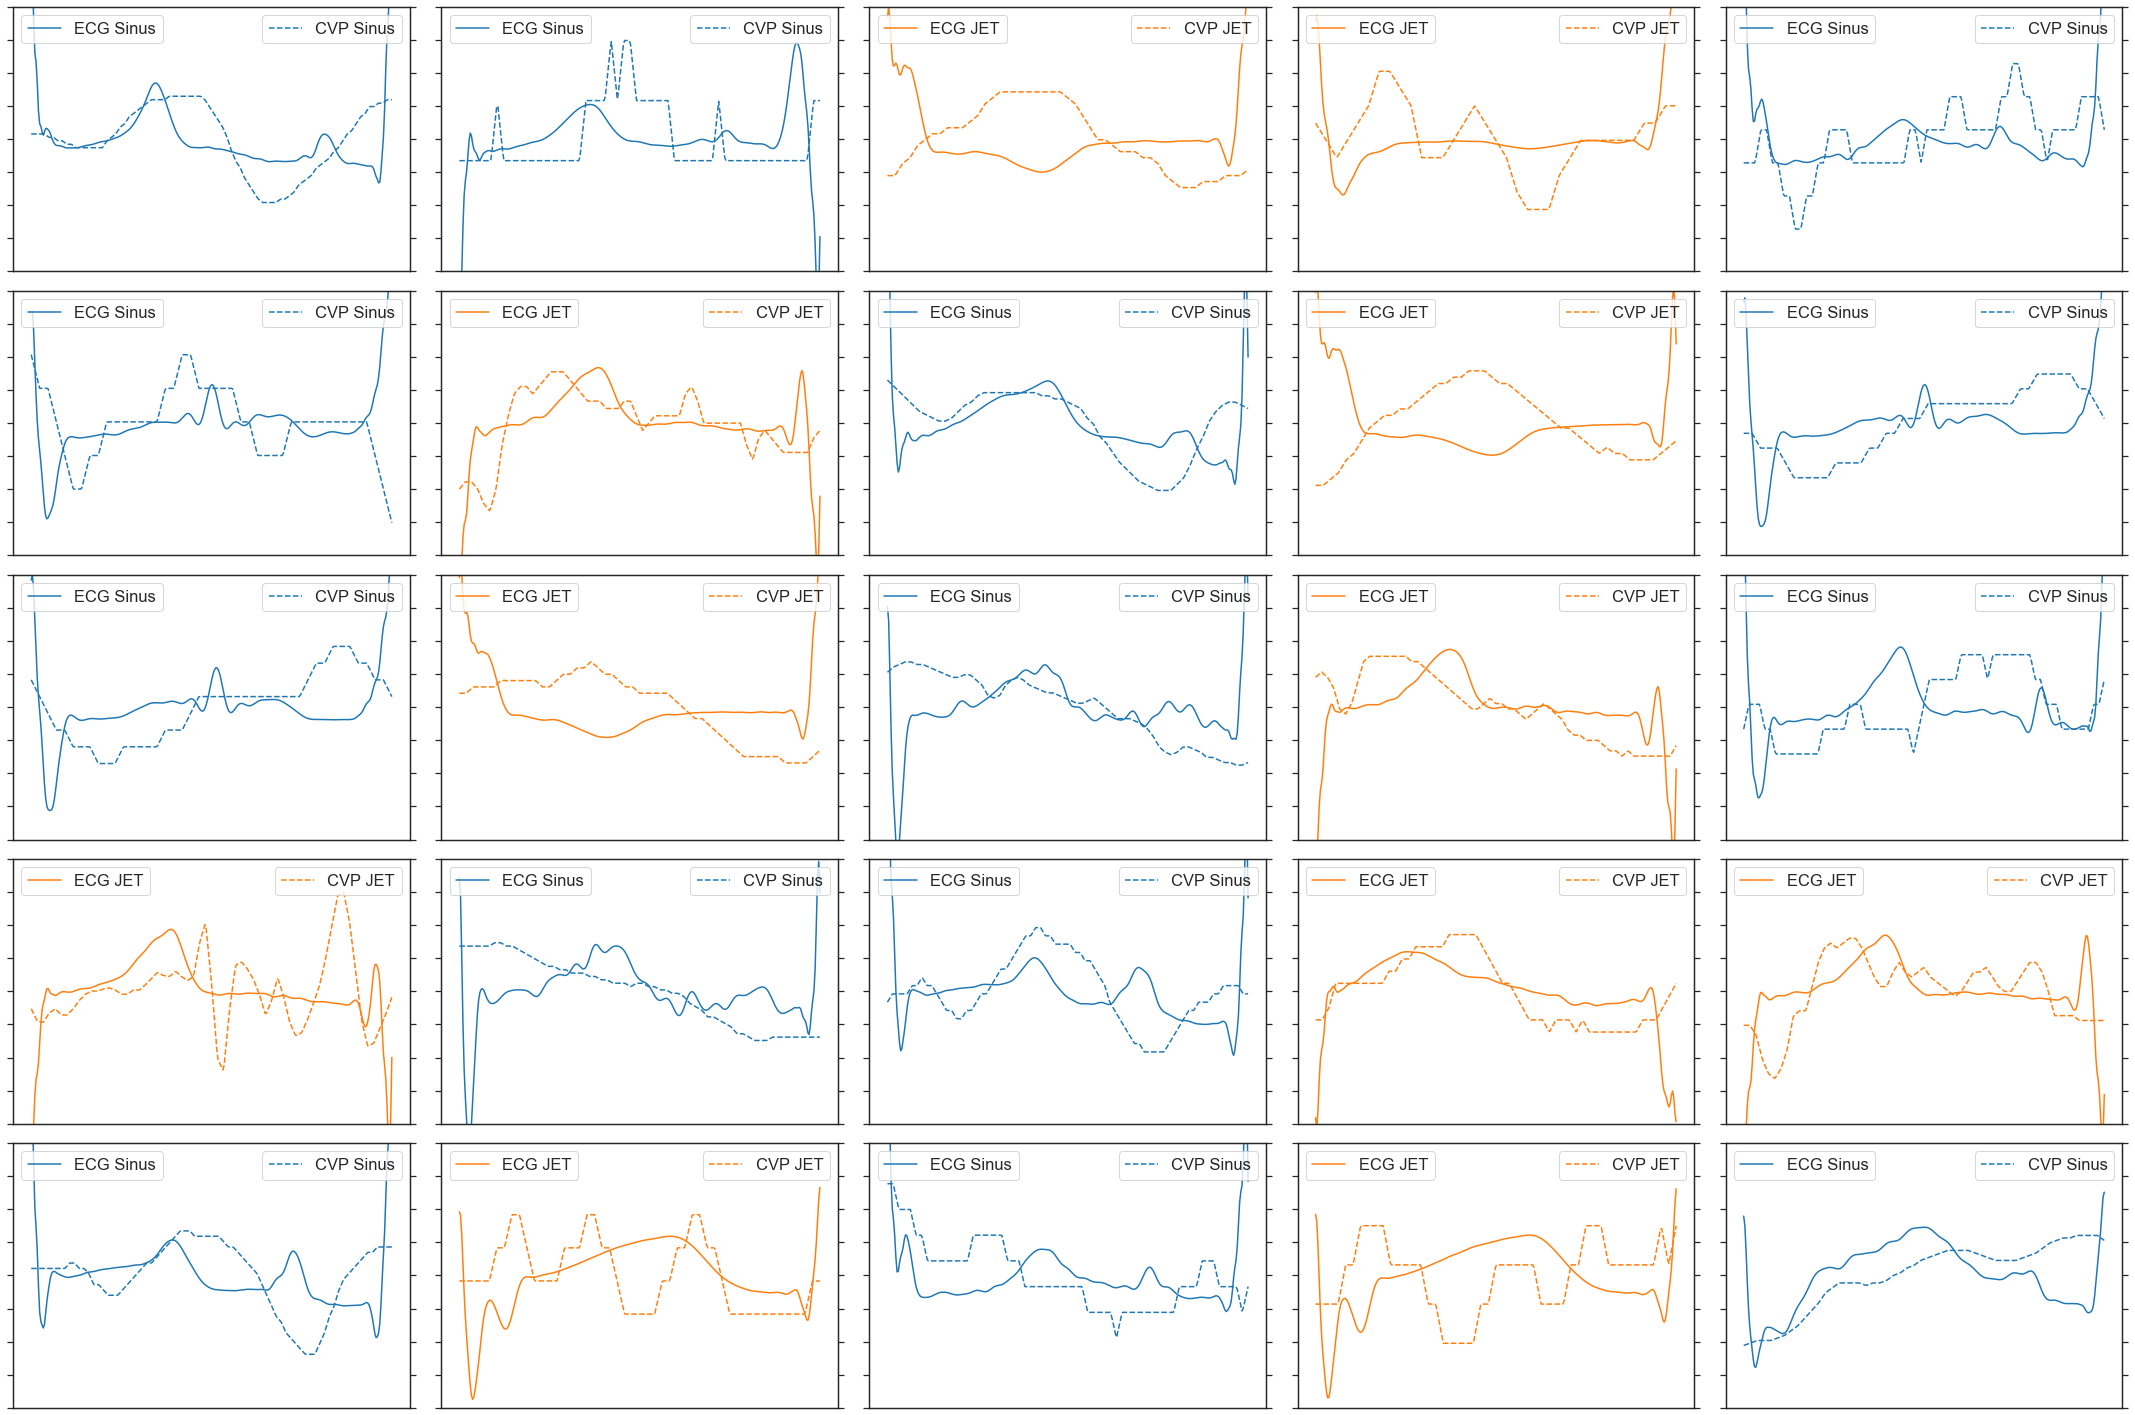

In [72]:
Show_ECG_CVPs(feature_with_ecg_df_test_single_lead, num_random_cycle_to_show=25, seed=0, normalize=True)

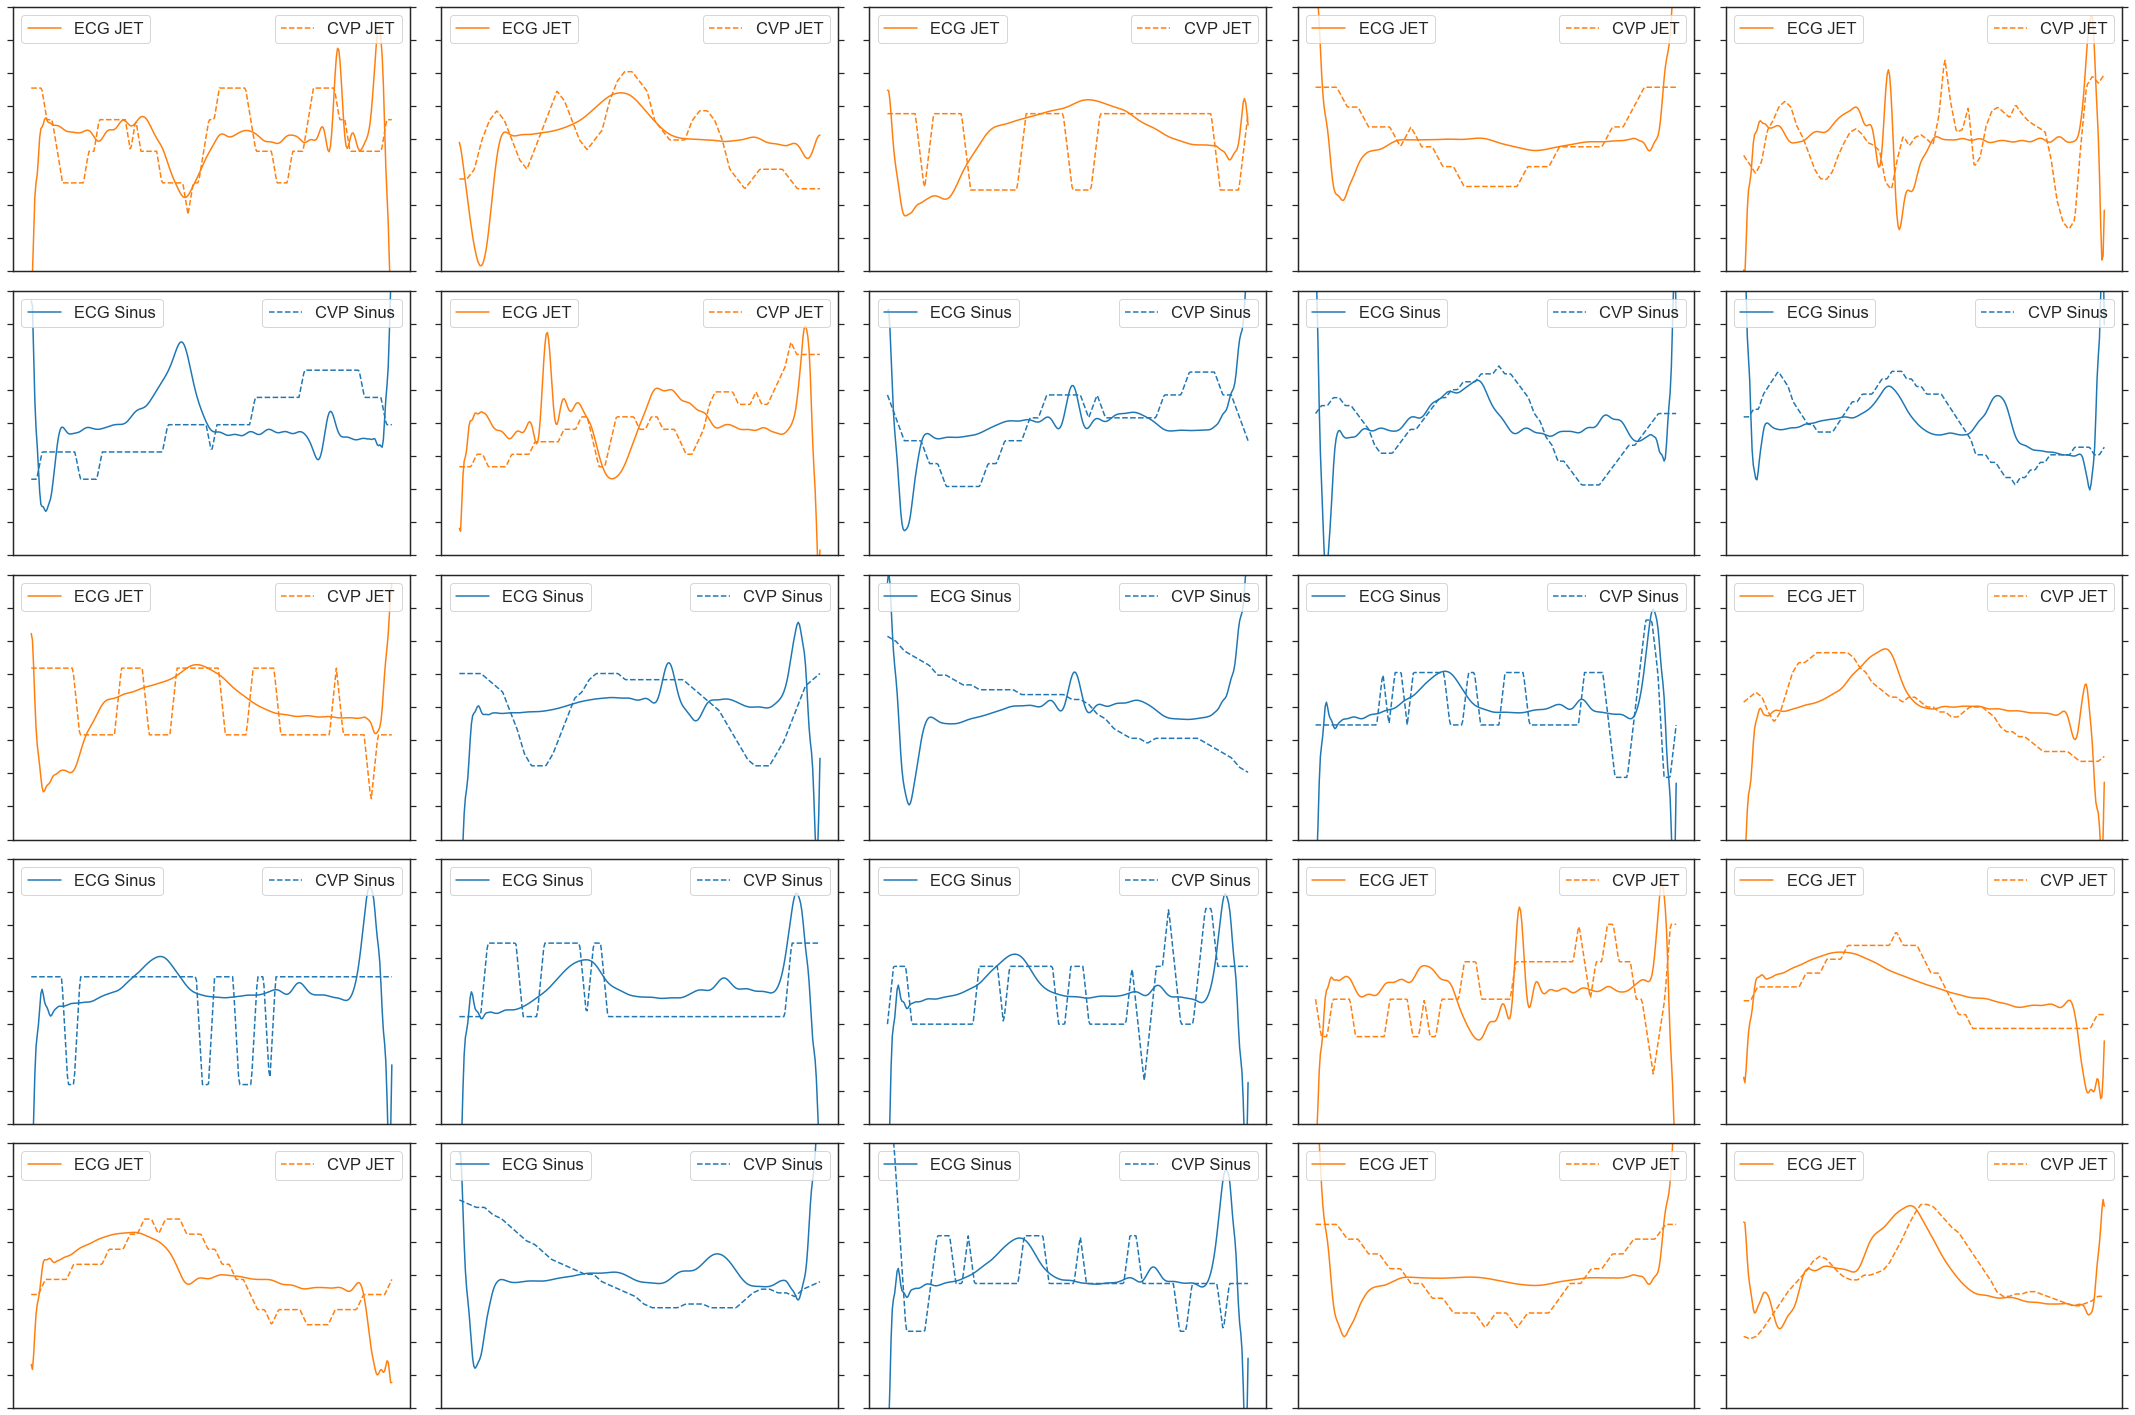

In [73]:
Show_ECG_CVPs(feature_with_ecg_df_test_single_lead, num_random_cycle_to_show=25, seed=1, normalize=True)

In [20]:
def Normalize(vec, eps=1e-8):
    """ Normalize a 1d vector to 0-1 range """
    vec = vec - np.min(vec)
    vec = vec / np.max(vec + eps)
    return vec

def Filter_data_by_id_dict(ecg_df, id_dict, num_cycle_to_show_each_side=4):
    cycle_ID = ecg_df[
        (ecg_df["patient_ID"] == id_dict["patient_ID"]) \
        & (ecg_df["interval_ID"] == id_dict["interval_ID"]) \
        & (ecg_df["block_ID"] == id_dict["block_ID"]) \
        & (ecg_df["channel_ID"] == id_dict["channel_ID"])
        & (ecg_df["r_ID_abs"] == id_dict["r_ID_abs"])   
    ]["cycle_ID"].values[0]
    ecg_df_selected = ecg_df[
        (ecg_df["patient_ID"] == id_dict["patient_ID"]) \
        & (ecg_df["interval_ID"] == id_dict["interval_ID"]) \
        & (ecg_df["block_ID"] == id_dict["block_ID"]) \
        & (ecg_df["channel_ID"] == id_dict["channel_ID"]) \
        & ((ecg_df["cycle_ID"] <= cycle_ID + num_cycle_to_show_each_side) \
          & (ecg_df["cycle_ID"] >= cycle_ID - num_cycle_to_show_each_side))
    ].sort_values(by=["cycle_ID"], ascending=True)
    return ecg_df_selected, cycle_ID

def Show_ECGs(dataset_df, patient_ID=None, num_random_cycle_to_show=5, 
    num_cycle_to_show_each_side=4, 
    target_threshold=0.5, seed=0, 
    ecg_colnames=None, ecg_resampling_length=300, label_dict=None,
    color_dict=None):
    
    if label_dict is None:
        label_dict = {0: "Sinus", 1: "JET"}
    if color_dict is None:
        color_dict = {0: cm.tab10(0), 1: cm.tab10(1)}
    if ecg_colnames is None:
        ecg_colnames = [f"ecg{i + 1}" for i in range(ecg_resampling_length)]
        
    if patient_ID is not None:
        dataset_df_selected = dataset_df.query(f"patient_ID == {int(patient_ID)}")
        print(f"Patient ID: {patient_ID}")
    else:
        dataset_df_selected = dataset_df
    print(f"# Available heartbeats = {len(dataset_df_selected)}")
    print(f"# Sinus beats = {len(dataset_df_selected.query(f'label == 0'))}")
    print(f"# JET beats = {len(dataset_df_selected.query(f'label == 1'))}")
    if len(dataset_df_selected) == 0:
        print(f"No samples available.")
        return
    
    """ Randomly select rows from df """
    np.random.seed(seed)
    idx_list = np.random.choice(np.arange(len(dataset_df_selected)), size=num_random_cycle_to_show, replace=False)
        
    
    nrow = len(idx_list)
    ncol = 2 * num_cycle_to_show_each_side + 1
    fig, axes = plt.subplots(nrow, ncol, figsize=(6 * ncol, 4 * nrow))
    for i, idx in enumerate(idx_list):
        dataset_df_selected_i = dataset_df_selected.iloc[idx, :]
        """ For each selected row, find its nearby heartbeats by matching patient_ID, cycle_ID, etc. """
        ecg_df_selected, cycle_ID = Filter_data_by_id_dict(dataset_df_selected, dataset_df_selected_i,
                                                           num_cycle_to_show_each_side=num_cycle_to_show_each_side)

        for j in range(len(ecg_df_selected)):
            ax = axes[i, j]
            cycle_ID_j = ecg_df_selected["cycle_ID"].values[j]
            patient_ID = ecg_df_selected["patient_ID"].values[j]
            label = ecg_df_selected["label"].values[j]
            ecg_signal = Normalize(ecg_df_selected[ecg_colnames].values[j, :])
            ax.plot(ecg_signal, color=color_dict[label], label=f"True label: {label_dict[label]}")
            ax.legend(loc='lower center')
            ax.set_xticklabels([])
            ax.set_ylabel(f"Cycle {cycle_ID_j}")
            ax.set_yticklabels([])    
            if j == len(ecg_df_selected) // 2:
                ax.set_title(f"Patient ID: {patient_ID}")

Patient ID: 756172
# Available heartbeats = 8614
# Sinus beats = 8614
# JET beats = 0


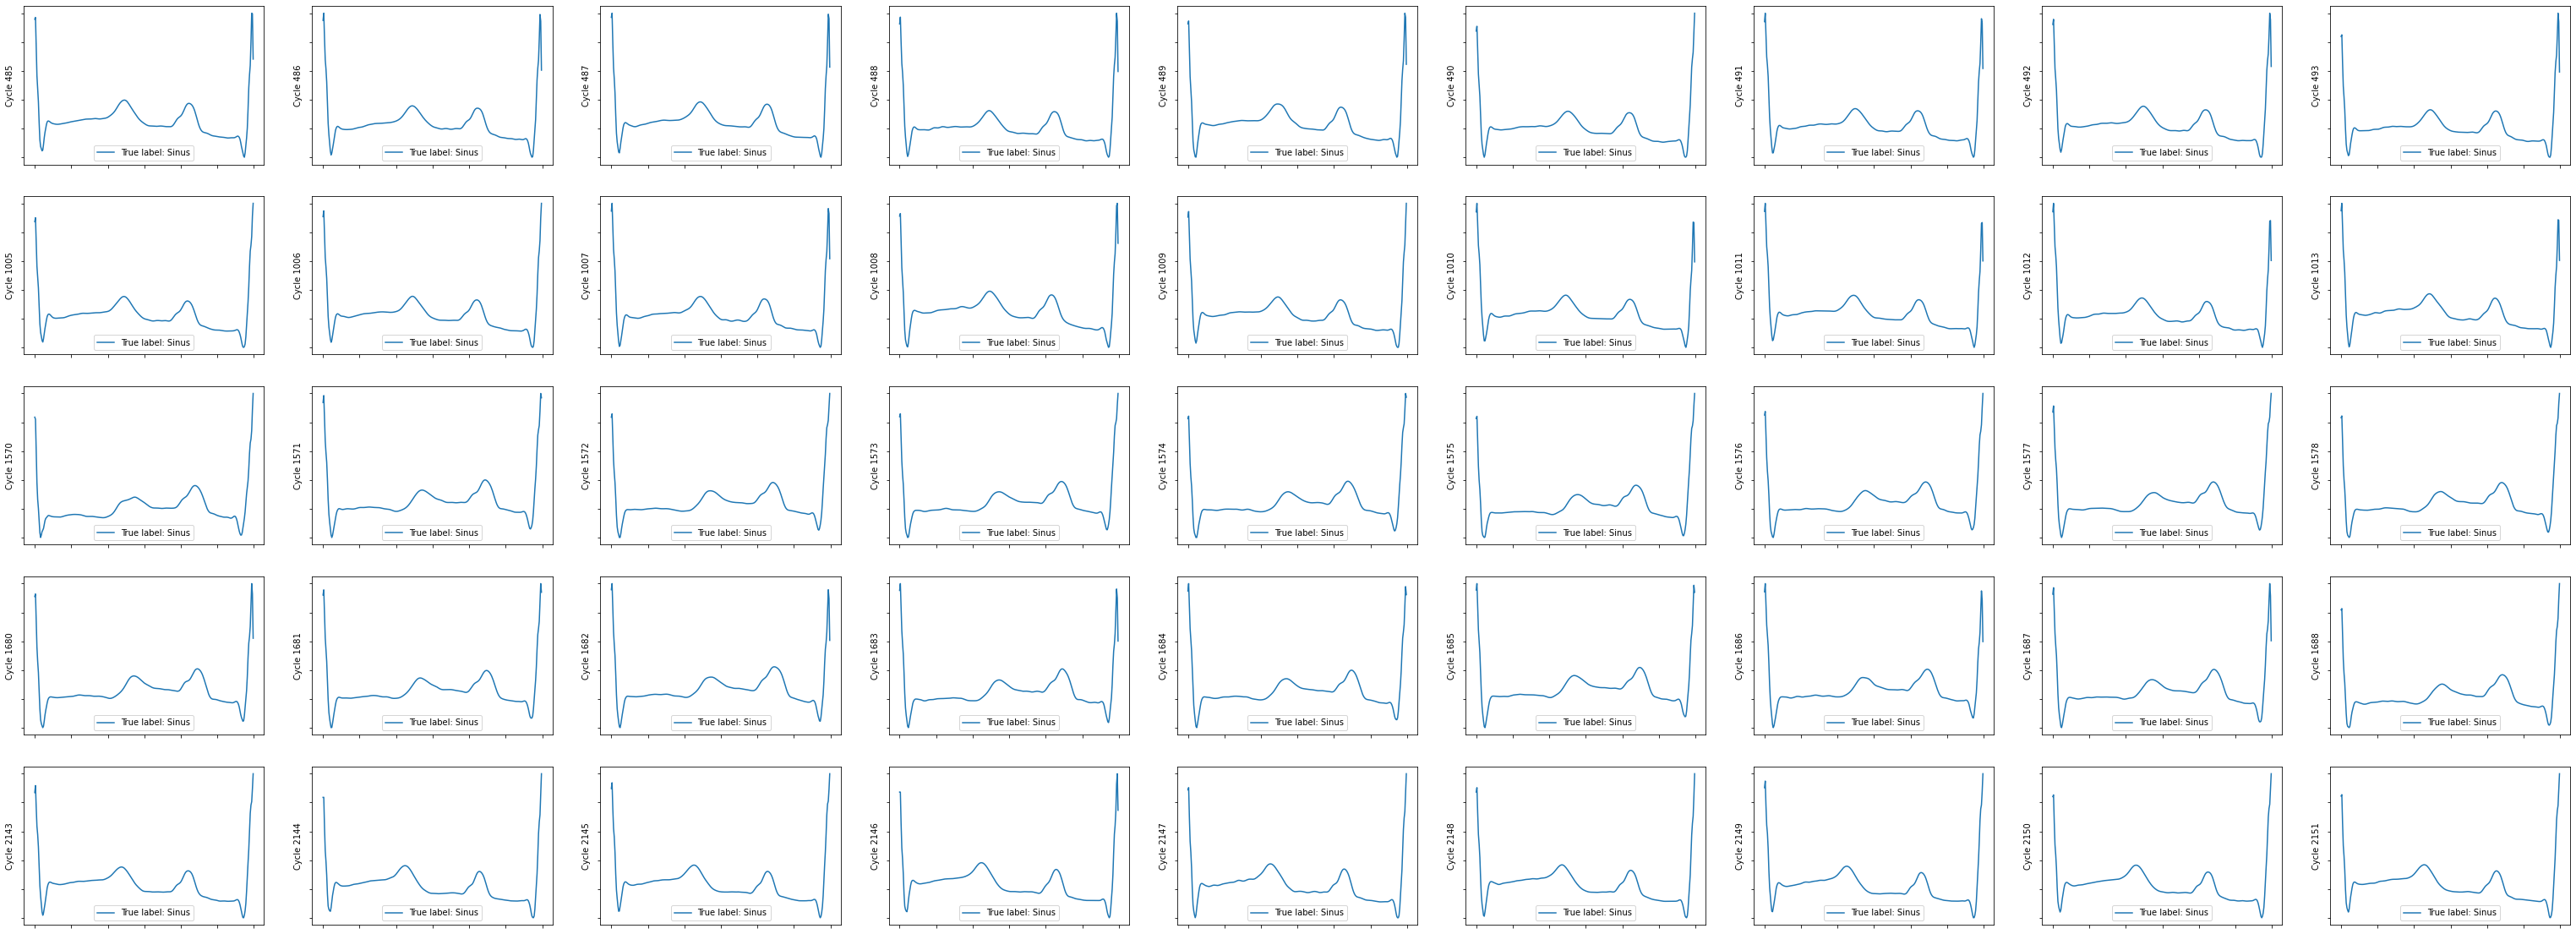

In [45]:
patient_ID = patient_ID_list_test[0]
dataset_df = feature_with_ecg_df_test_single_lead
num_random_cycle_to_show = 5
num_cycle_to_show_each_side = 4
seed = 0
Show_ECGs(dataset_df, patient_ID=patient_ID, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)

In [42]:
patient_ID = patient_ID_list_test[0]
dataset_df = feature_with_ecg_df_test_single_lead.query(f"label == 1")
num_random_cycle_to_show = 5
num_cycle_to_show_each_side = 4
seed = 0
Show_ECGs(dataset_df, patient_ID=patient_ID, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)

Patient ID: 756172
# Available heartbeats = 0
# Sinus beats = 0
# JET beats = 0
No samples available.


Patient ID: 424072
# Available heartbeats = 1529
# Sinus beats = 0
# JET beats = 1529


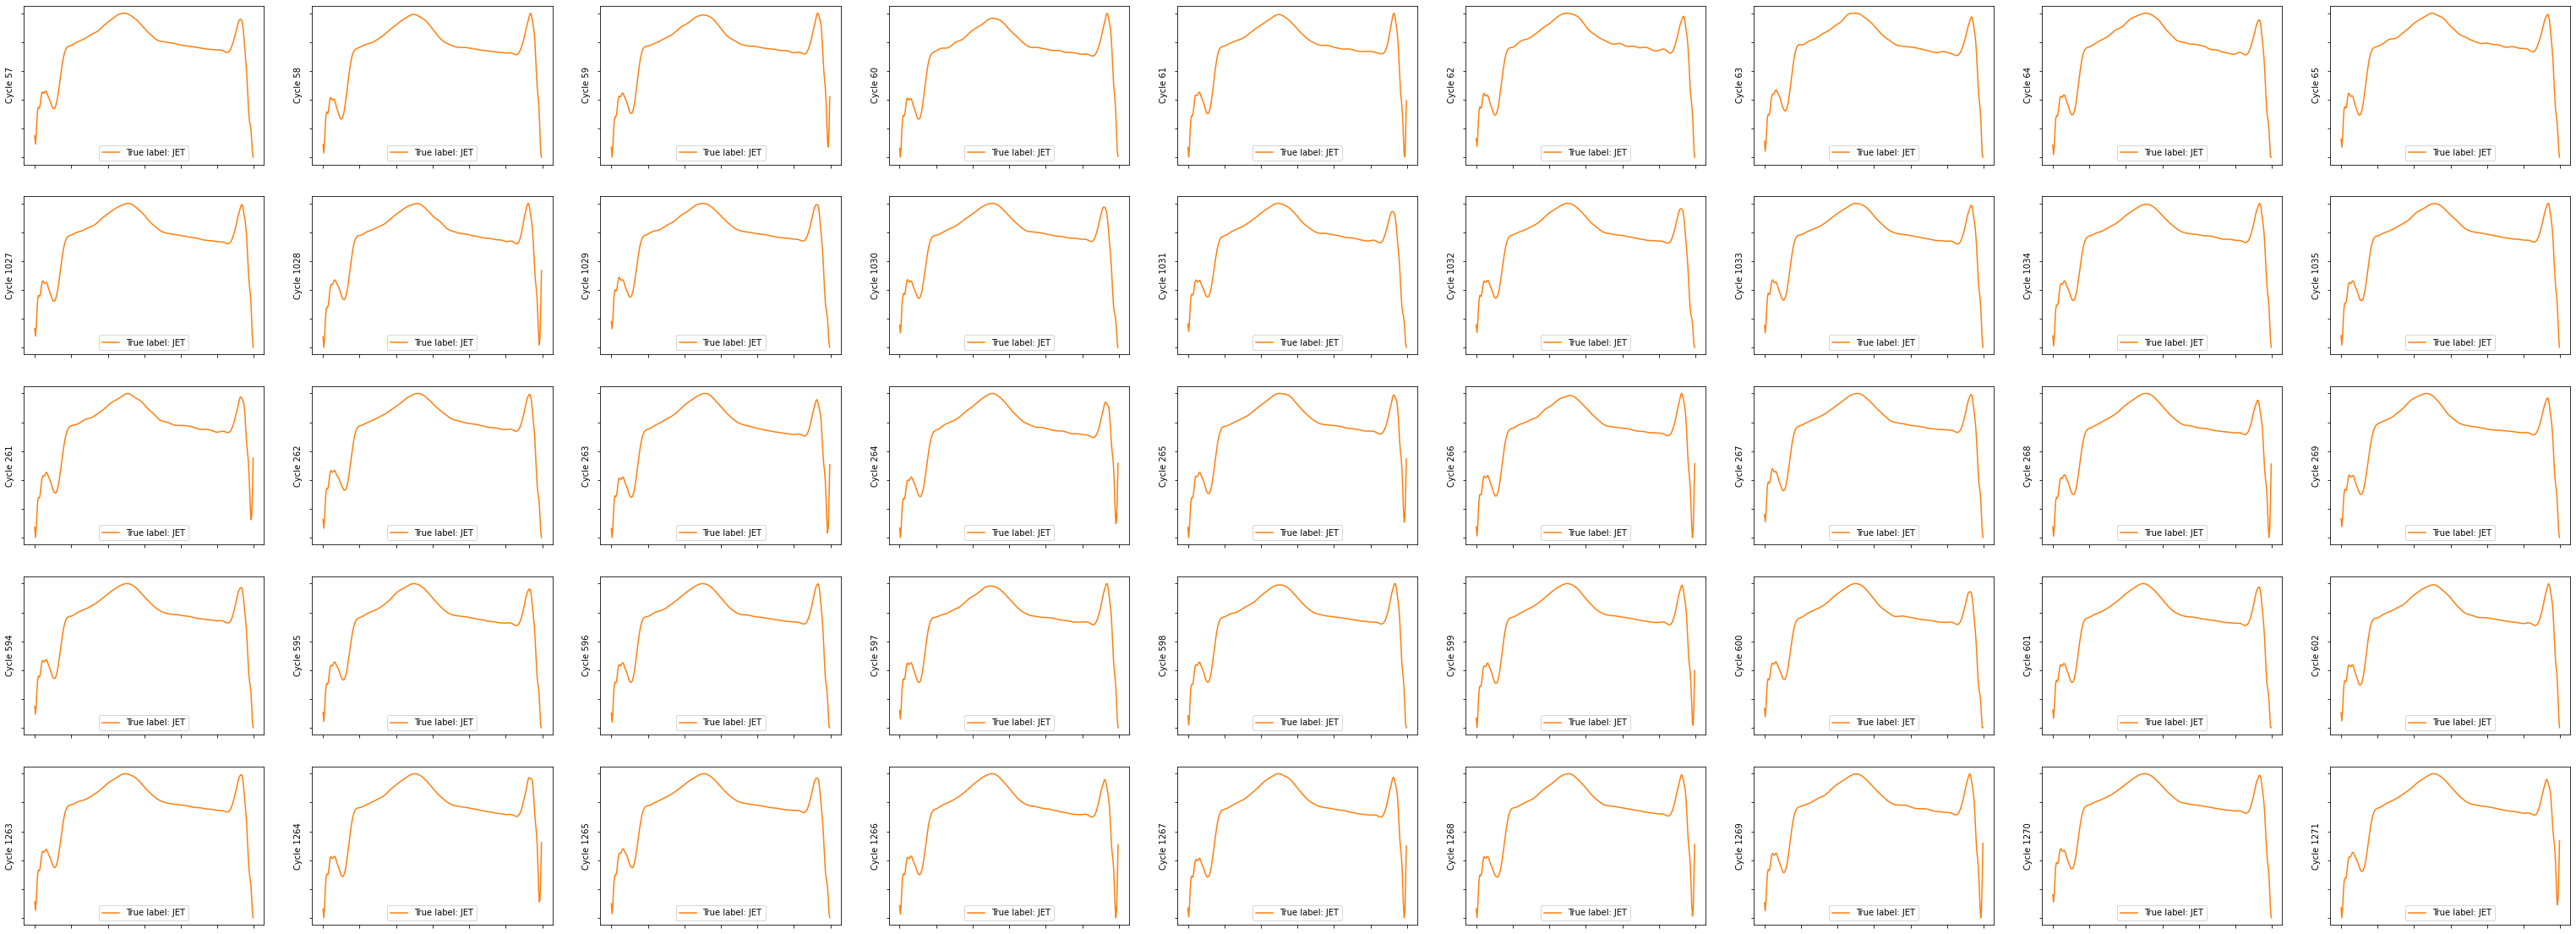

In [43]:
patient_ID = patient_ID_list_test[1]
dataset_df = feature_with_ecg_df_test_single_lead.query(f"label == 1")
num_random_cycle_to_show = 5
num_cycle_to_show_each_side = 4
seed = 1
Show_ECGs(dataset_df, patient_ID=patient_ID, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)

# Available heartbeats = 68589
# Sinus beats = 68589
# JET beats = 0


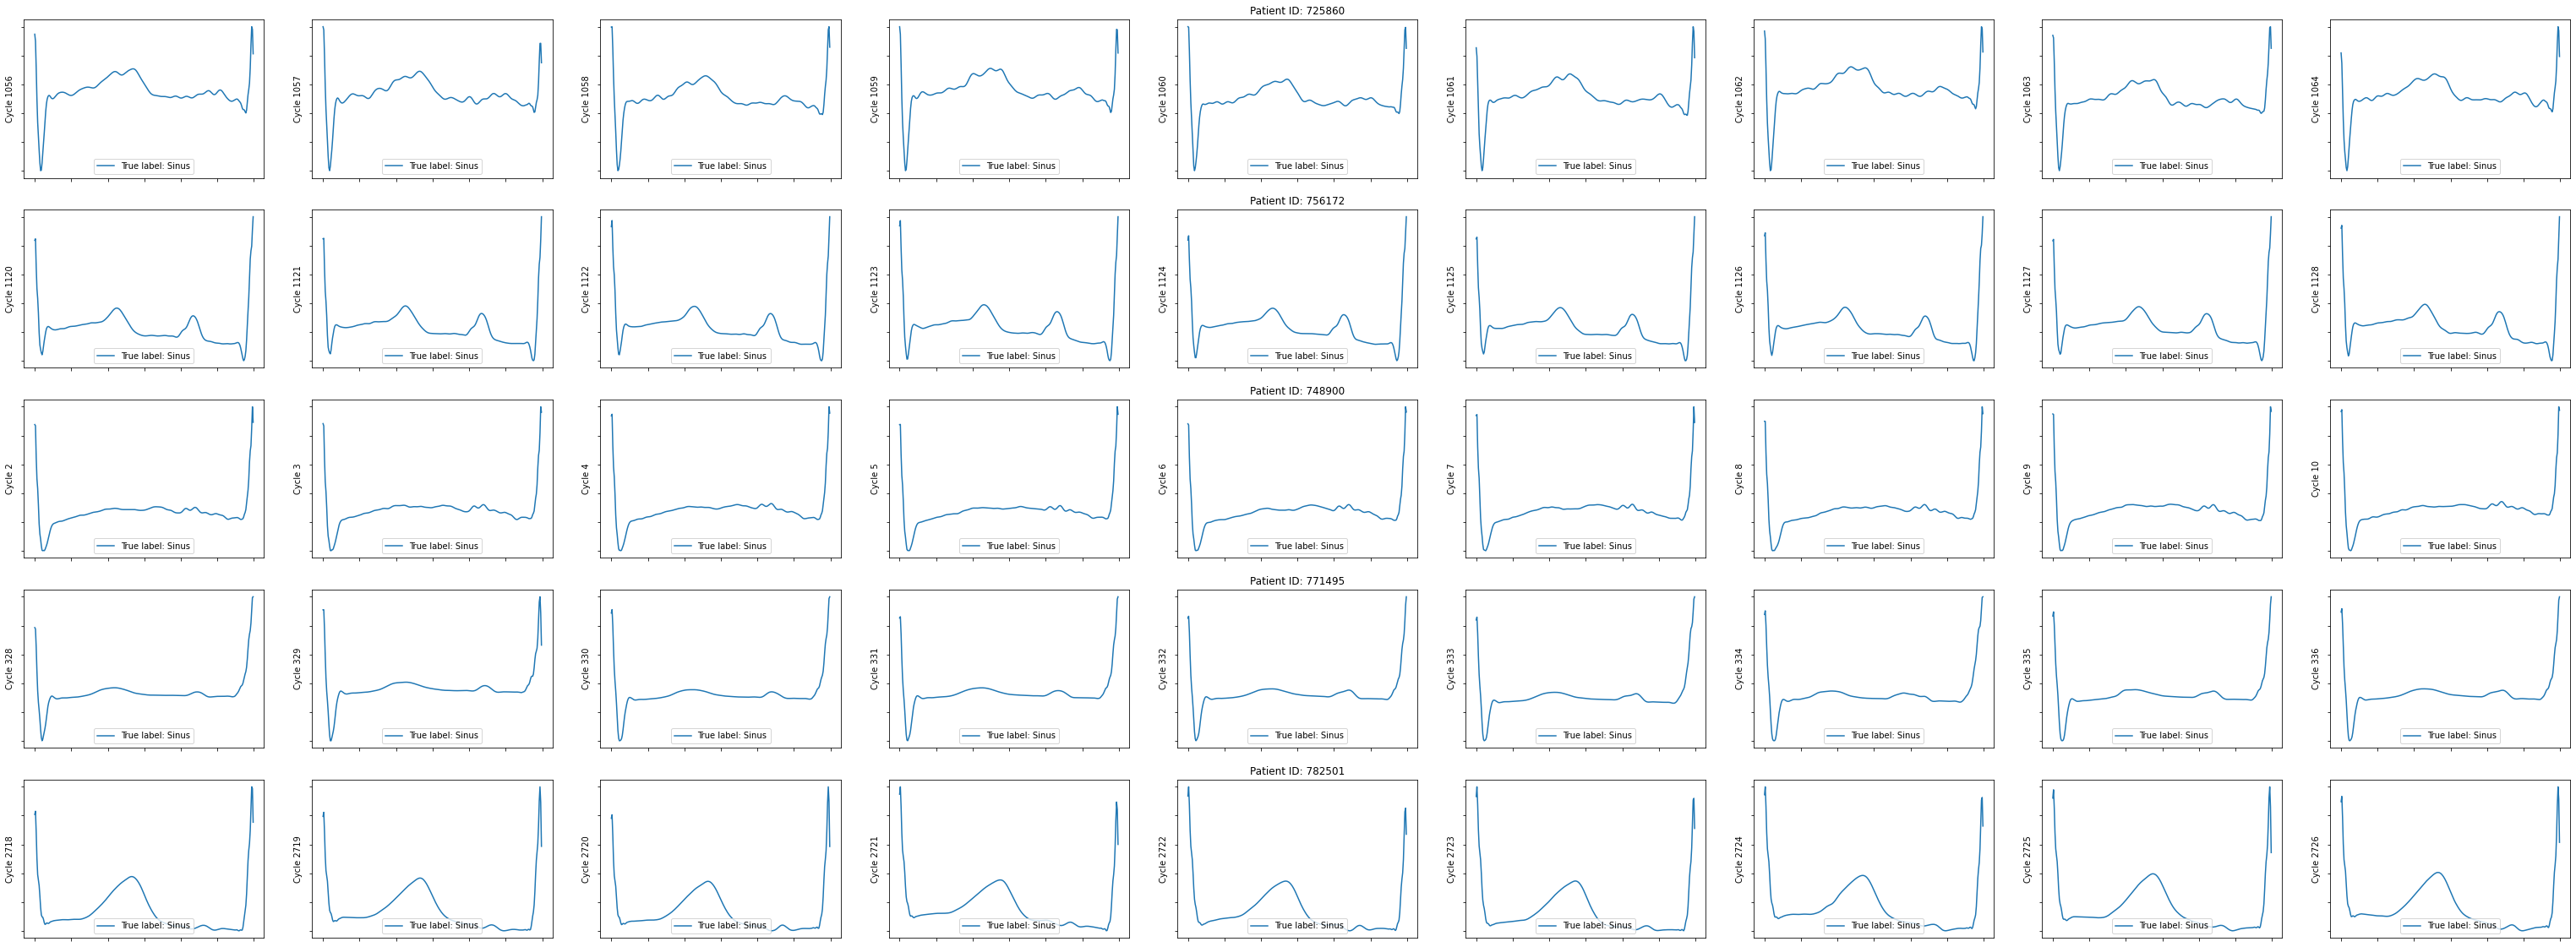

In [51]:
dataset_df = feature_with_ecg_df_test_single_lead.query(f"label == 0")
num_random_cycle_to_show = 5
num_cycle_to_show_each_side = 4
seed = 1
Show_ECGs(dataset_df, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)

# Available heartbeats = 45823
# Sinus beats = 0
# JET beats = 45823


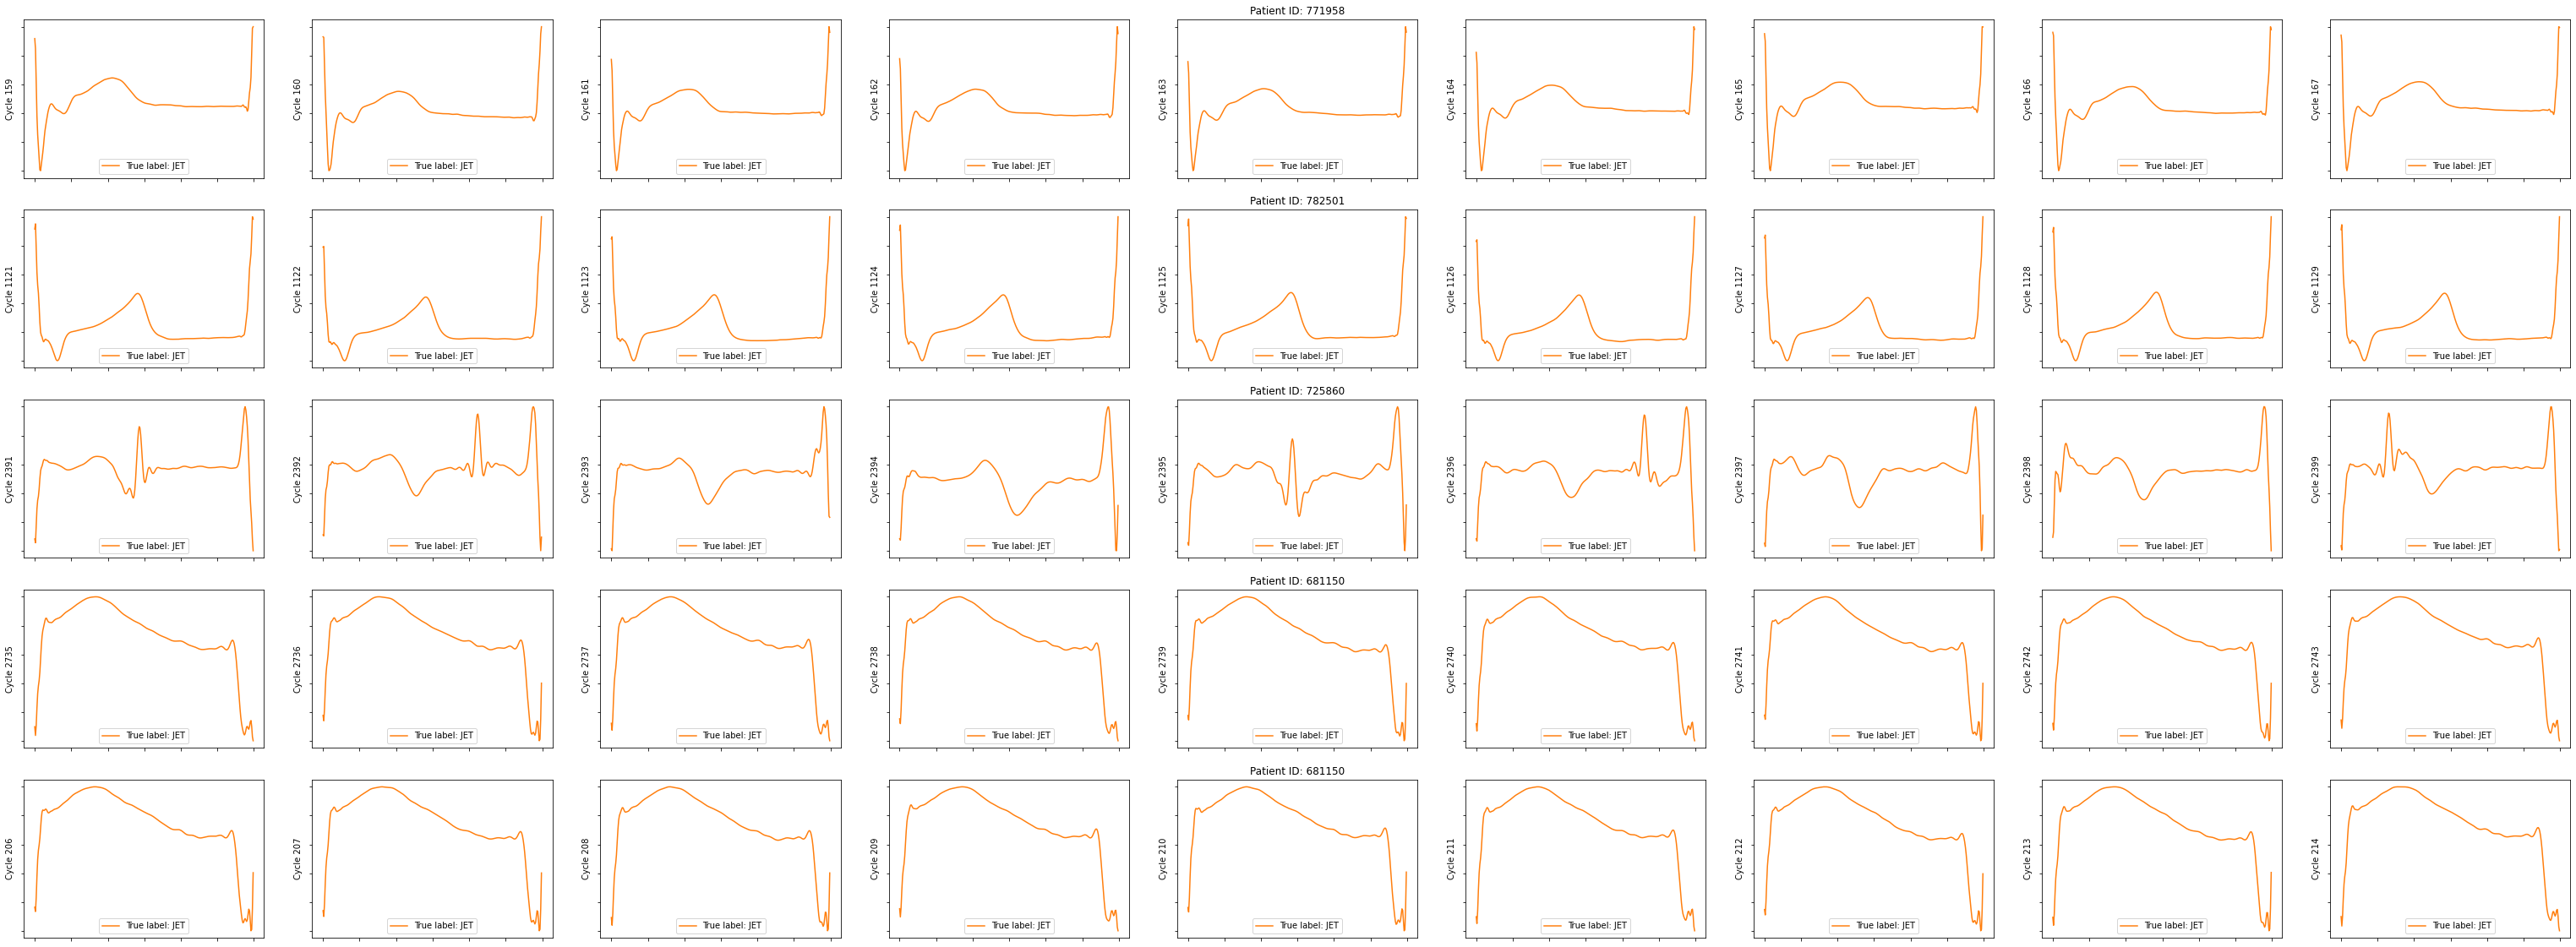

In [52]:
dataset_df = feature_with_ecg_df_test_single_lead.query(f"label == 1")
num_random_cycle_to_show = 5
num_cycle_to_show_each_side = 4
seed = 1
Show_ECGs(dataset_df, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)

Patient ID: 725860
# Available heartbeats = 6839
# Sinus beats = 0
# JET beats = 6839


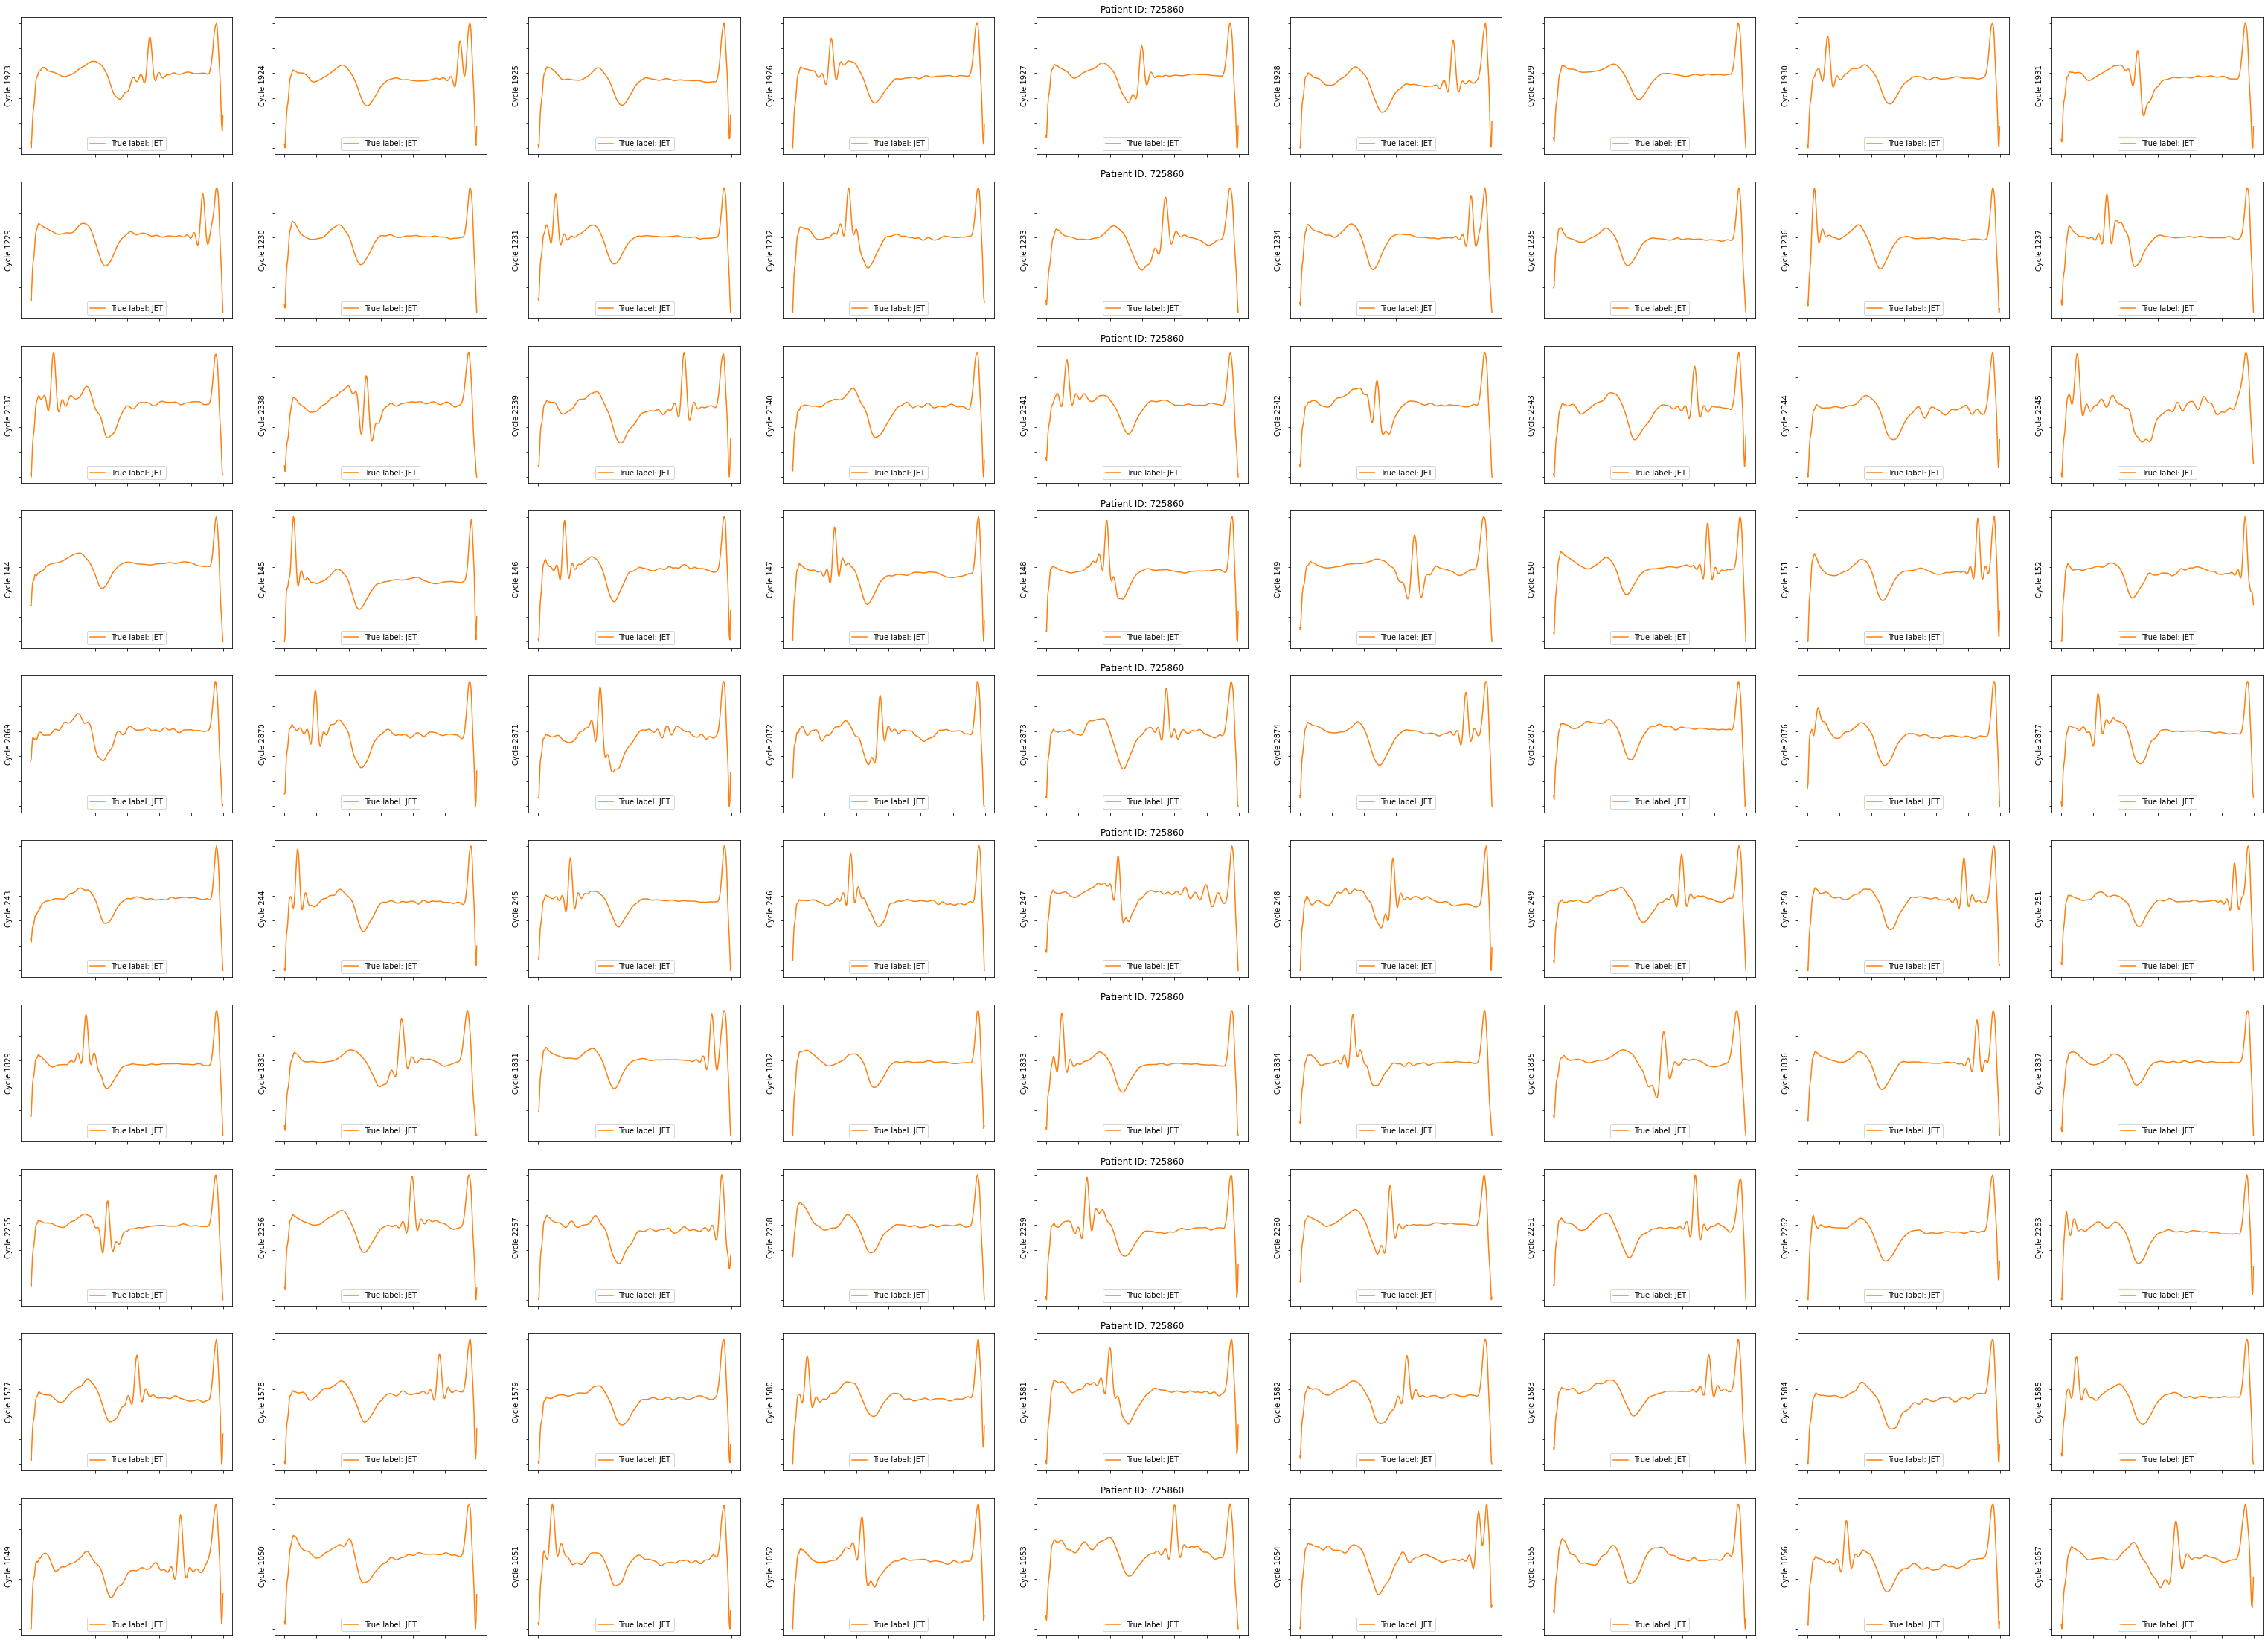

In [50]:
patient_ID = 725860
dataset_df = feature_with_ecg_df_test_single_lead.query(f"label == 1")
num_random_cycle_to_show = 10
num_cycle_to_show_each_side = 4
seed = 1
Show_ECGs(dataset_df, patient_ID=patient_ID, num_random_cycle_to_show=num_random_cycle_to_show,
          num_cycle_to_show_each_side=num_cycle_to_show_each_side, seed=seed)